# Jeu de Données "Marketing Campaign"
### Julie Laurent, Quentin Senatore, Quentin Touil et Ema Galuppini

## Présentation des Données à analyser : 

#### Introduction :
Le jeu de données étudié provient d'une campagne marketing et contient diverses informations sur les clients, incluant leurs caractéristiques démographiques, leurs habitudes de consommation et leur réponse aux actions marketing. Ce type de données est particulièrement intéressant pour comprendre les comportements des consommateurs et optimiser les stratégies marketing des entreprises.

L’analyse de la personnalité des clients est une analyse détaillée des clients idéaux d’une entreprise. Elle aide une entreprise à mieux comprendre ses clients et lui permet de modifier plus facilement ses produits en fonction des besoins, comportements et préoccupations spécifiques des différents types de clients.

L’analyse de la personnalité des clients aide une entreprise à adapter son produit en fonction de ses clients cibles provenant de différents segments de clientèle. Par exemple, au lieu de dépenser de l’argent pour commercialiser un nouveau produit auprès de tous les clients de la base de données de l’entreprise, une entreprise peut analyser quel segment de clientèle est le plus susceptible d’acheter le produit et ensuite commercialiser le produit uniquement auprès de ce segment particulier.

Finalement, l’objectif de notre analyse est de dégager des tendances et d’identifier des segments de clients ayant des comportements similaires. Cela permettra d'affiner les stratégies marketing et d’optimiser les campagnes futures. Nous utiliserons des outils statistiques et des visualisations pour mieux comprendre les données.

#### Jeu de données à analyser :

* People

    ID: Customer's unique identifier  
    Year_Birth: Customer's birth year  
    Education: Customer's education level  
    Marital_Status: Customer's marital status  
    Income: Customer's yearly household income  
    Kidhome: Number of children in customer's household  
    Teenhome: Number of teenagers in customer's household  
    Dt_Customer: Date of customer's enrollment with the company  
    Recency: Number of days since customer's last purchase  
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

* Products

    MntWines: Amount spent on wine in last 2 years  
    MntFruits: Amount spent on fruits in last 2 years  
    MntMeatProducts: Amount spent on meat in last 2 years  
    MntFishProducts: Amount spent on fish in last 2 years  
    MntSweetProducts: Amount spent on sweets in last 2 years  
    MntGoldProds: Amount spent on gold in last 2 years  

* Promotion

    NumDealsPurchases: Number of purchases made with a discount  
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

* Place

    NumWebPurchases: Number of purchases made through the company’s website  
    NumCatalogPurchases: Number of purchases made using a catalogue  
    NumStorePurchases: Number of purchases made directly in stores  
    NumWebVisitsMonth: Number of visits to company’s website in the last month  

#### Questions sucitées :

* Qualité du jeu de données proposé ?
* Un pre-processing des données est-il nécessaire ?
* Comment se comportent les différentes variables entre elles ?
* Les achats dépendent-ils du style de vie de l'acheteur (famille, marié, revenu etc) ?
* Les promotions proposées sont elles efficaces ? Sur quels types de clients ? Sur quels types de produits ?
* Quels endroits de ventes sont le plus utilisés ? Sur quels types de clients ? Sur quels types de produits ?
* Des profils de clients se dessinent-ils ? Si oui, quels types de clients, quels types d'achats, grace à quels endroits de ventes ?

## Installation des packages utilisés et chargement des données : 

In [1]:
library(ggplot2)
library(graphics)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(GGally)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
data <- read.csv("marketing_campaign.csv", header=TRUE, sep="\t")
head(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [3]:
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

## Transformation et Nettoyage des données : 

On remarque ici que les variables Z_CostContact et Z_Revenue sont des constantes donc il est pertinent de les retirer de notre jeu de données. 

In [4]:
data<-data[,-27]
data<-data[,-27]
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

Regardons maintenant si certaines données sont manquantes/incomplètes.

In [5]:
colnames(data)[apply(data, 2, anyNA)]

[1] "Income"

Ici on remarque que la variable 'Income' est incomplète (24 valeurs sont manquantes comme on peut le voir dans le summary ci-dessus).
On décide donc de remplacer ces valeurs par la médiane des valeurs complètes de Income. 
On utilise la médiane au lieu de la moyenne pour que les outliers (ici 6666) n'influence la valeur que l'on va prendre.

In [6]:
data$Income <-ifelse(is.na(data$Income), median(data$Income, na.rm = TRUE), data$Income)

In [7]:
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35539   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52238   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68290   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :666666   Max.   :2.0000   Max.   :2.0000                     
    Recency  

In [8]:
#on met en facteur les variables qualitatives pour pouvoir travailler dessus
data[, "Education"] <- as.factor(data[, "Education"])
data[, "Marital_Status"] <- as.factor(data[, "Marital_Status"])
data[, "Kidhome"] <- as.factor(data[, "Kidhome"])
data[, "Teenhome"] <- as.factor(data[, "Teenhome"])
data[, "AcceptedCmp3"] <- as.factor(data[, "AcceptedCmp3"])
data[, "AcceptedCmp4"] <- as.factor(data[, "AcceptedCmp4"])
data[, "AcceptedCmp5"] <- as.factor(data[, "AcceptedCmp5"])
data[, "AcceptedCmp1"] <- as.factor(data[, "AcceptedCmp1"])
data[, "AcceptedCmp2"] <- as.factor(data[, "AcceptedCmp2"])
data[, "Complain"] <- as.factor(data[, "Complain"])
data[, "Response"] <- as.factor(data[, "Response"])

In [9]:
#on transforme la variable Dt_Customer en Date
data[,"Dt_Customer"] <- as.Date(data$Dt_Customer, format = "%d-%m-%Y")
summary(data$Dt_Customer)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2012-07-30" "2013-01-16" "2013-07-08" "2013-07-10" "2013-12-30" "2014-06-29"

### Analyse des outliers :

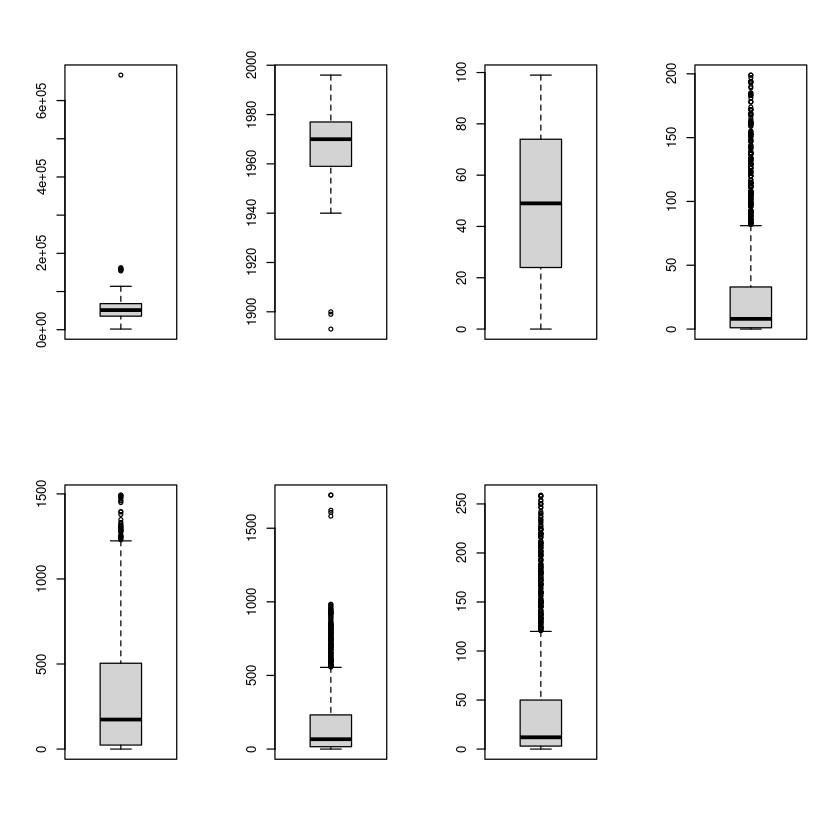

In [10]:
par(mfrow = c(2, 4))  
boxplot(data$Income)
boxplot(data$Year_Birth)
boxplot(data$Recency)
boxplot(data$MntFruits)
boxplot(data$MntWines)
boxplot(data$MntMeatProducts)
boxplot(data$MntFishProducts)

On fait les boxplots de chaque variables pour observer si il y a des valeurs abérrantes.
- ici on ne regarde pas la variable Dt_Customer que l'on transformera plus tard en numeric
- on remarque plusieurs outliers au niveau de plusieurs variables que l'on va devoir enlever :

Income : on voit un outlier 

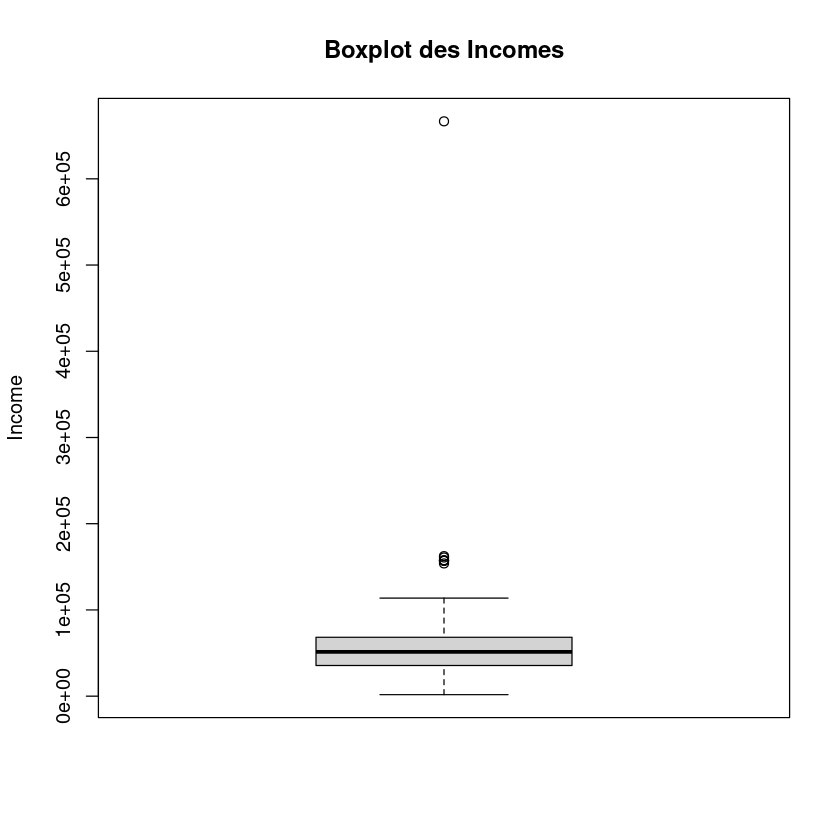

In [11]:
boxplot(data$Income, main = "Boxplot des Incomes", ylab = "Income")

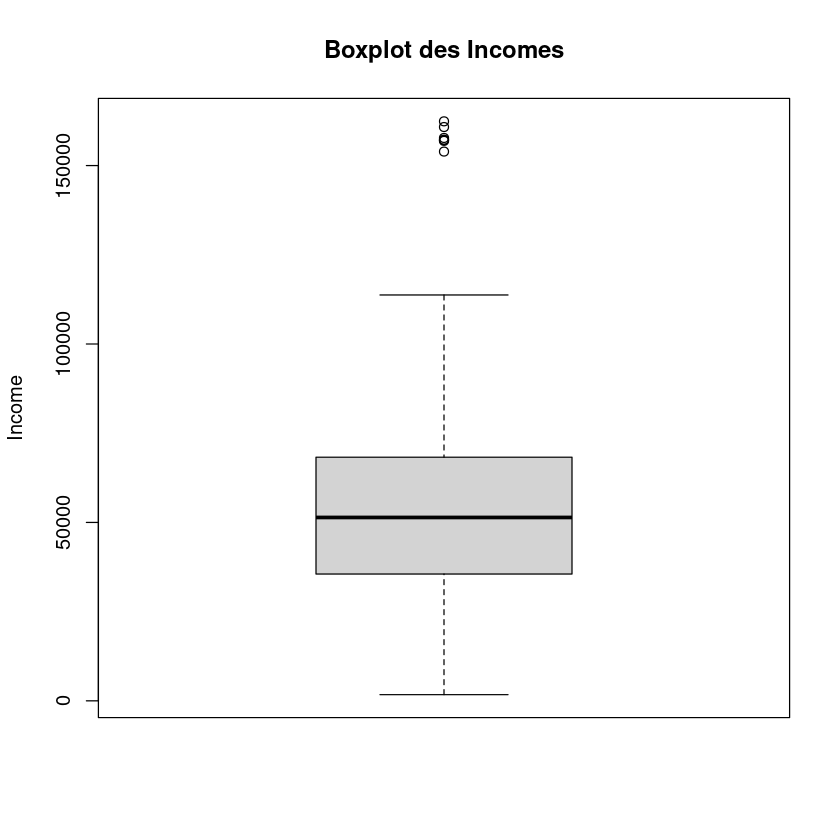

In [12]:
data_clean <- data[data$Income <= 500000, ]
#verification : 
boxplot(data_clean$Income, main = "Boxplot des Incomes", ylab = "Income")

Year_Birth : plusieurs outliers (les personnes ne sont surement plus de ce monde)

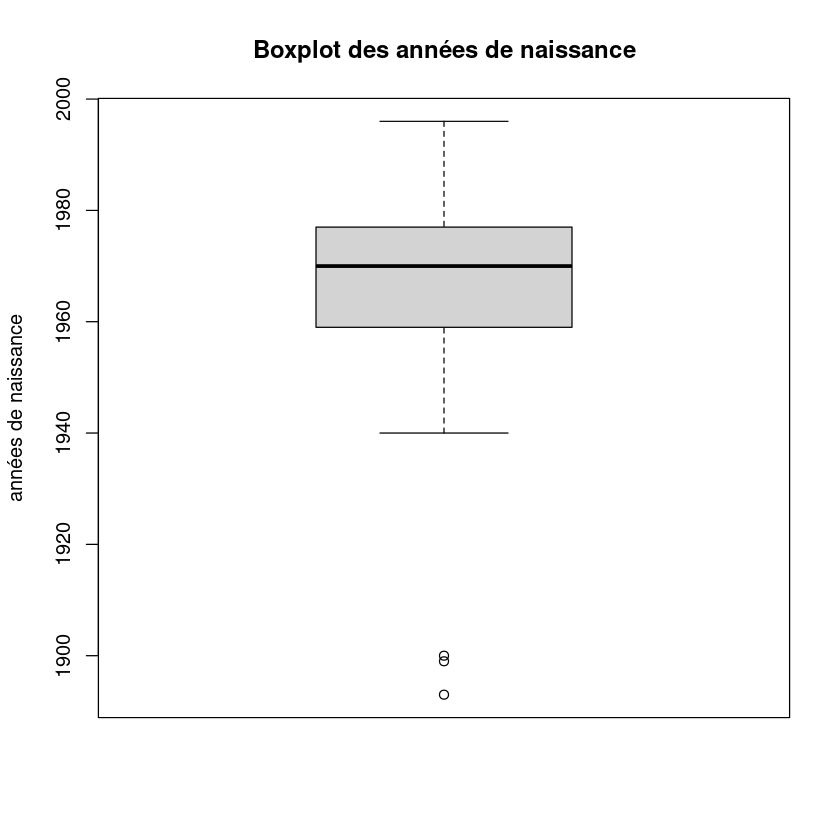

In [13]:
boxplot(data_clean$Year_Birth, main = "Boxplot des années de naissance", ylab = "années de naissance")

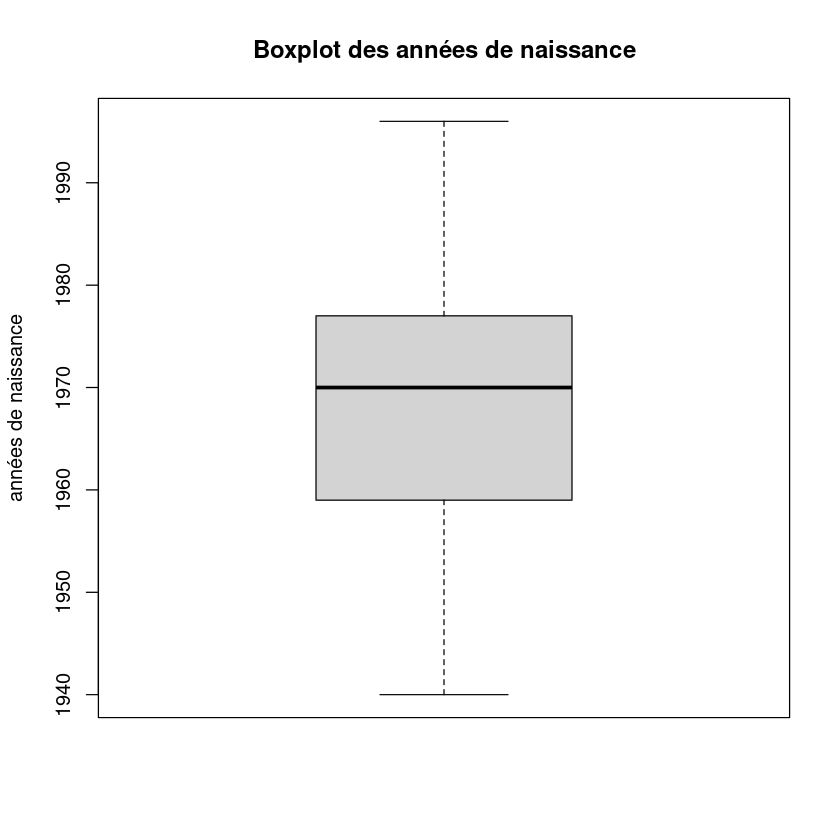

In [14]:
data_clean <- data_clean[data_clean$Year_Birth > 1920, ]
#verification :
boxplot(data_clean$Year_Birth, main = "Boxplot des années de naissance", ylab = "années de naissance")

MntMeatProducts : plusieurs outliers (ce ne sont pas forcément des données fausses mais l'objectif est de cibler des clients types, non des clients niches)

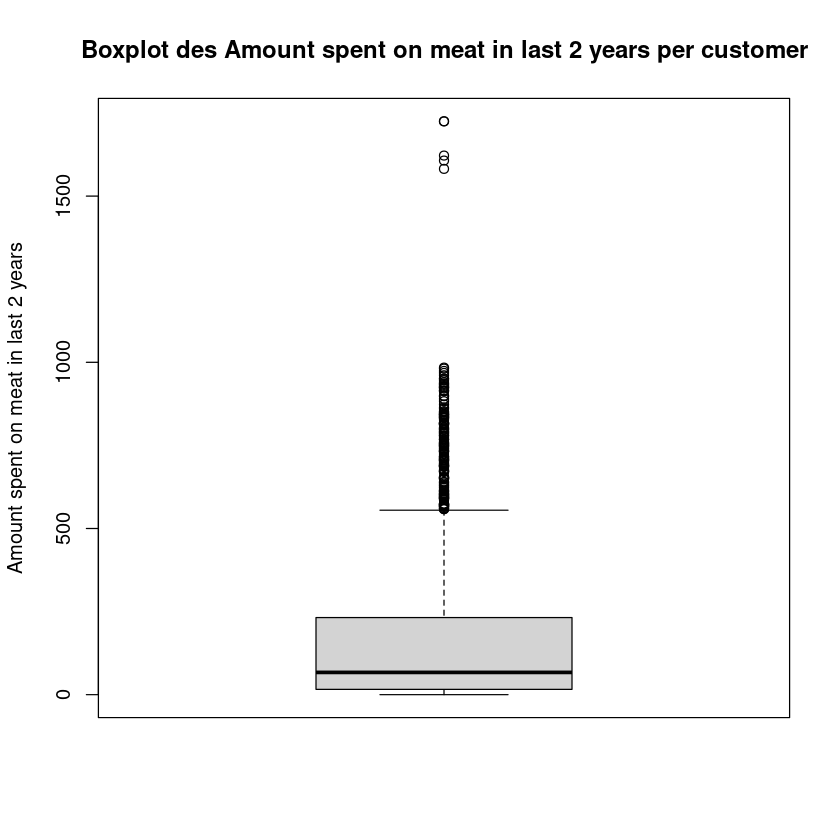

In [15]:
boxplot(data_clean$MntMeatProducts, main = "Boxplot des Amount spent on meat in last 2 years per customer", ylab = "Amount spent on meat in last 2 years")

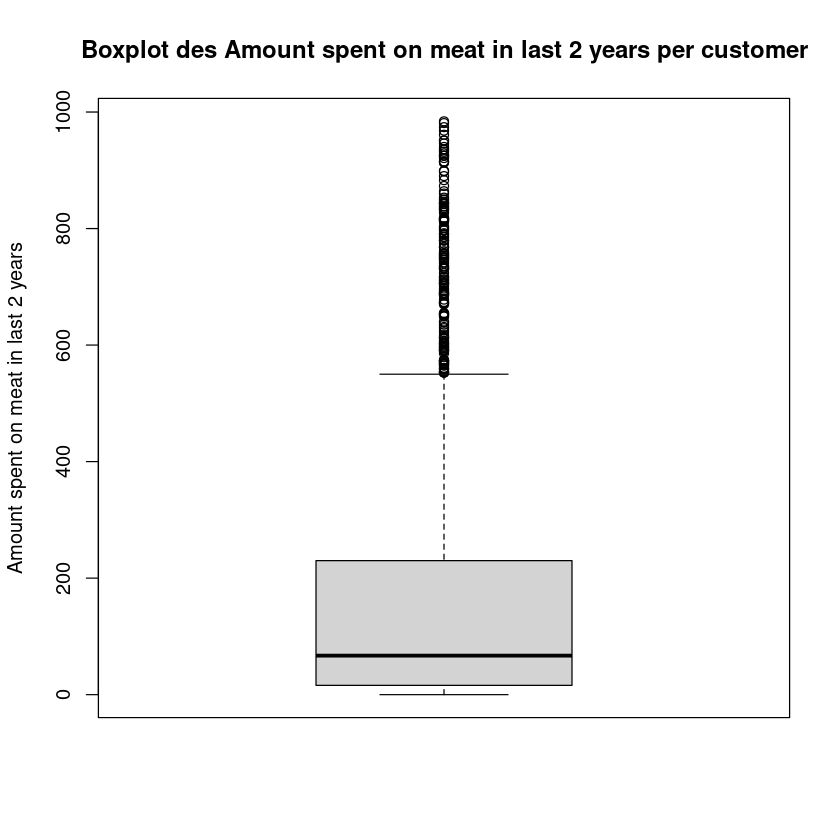

In [16]:
data_clean <- data_clean[data_clean$MntMeatProducts < 1500, ]
#verification :
boxplot(data_clean$MntMeatProducts, main = "Boxplot des Amount spent on meat in last 2 years per customer", ylab = "Amount spent on meat in last 2 years")

Nous venons d'enlever tout les outliers. 
### Catégorie d'age

Nous allons maintenant réaliser des catégories d'age à partir de l'année de naissance

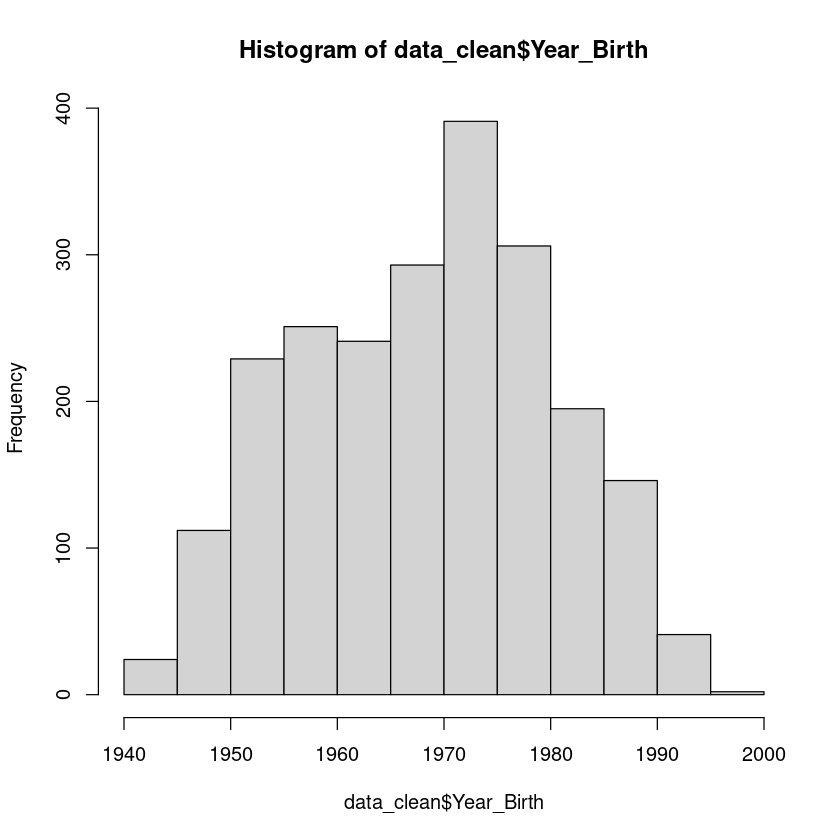

In [17]:
hist(data_clean$Year_Birth)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




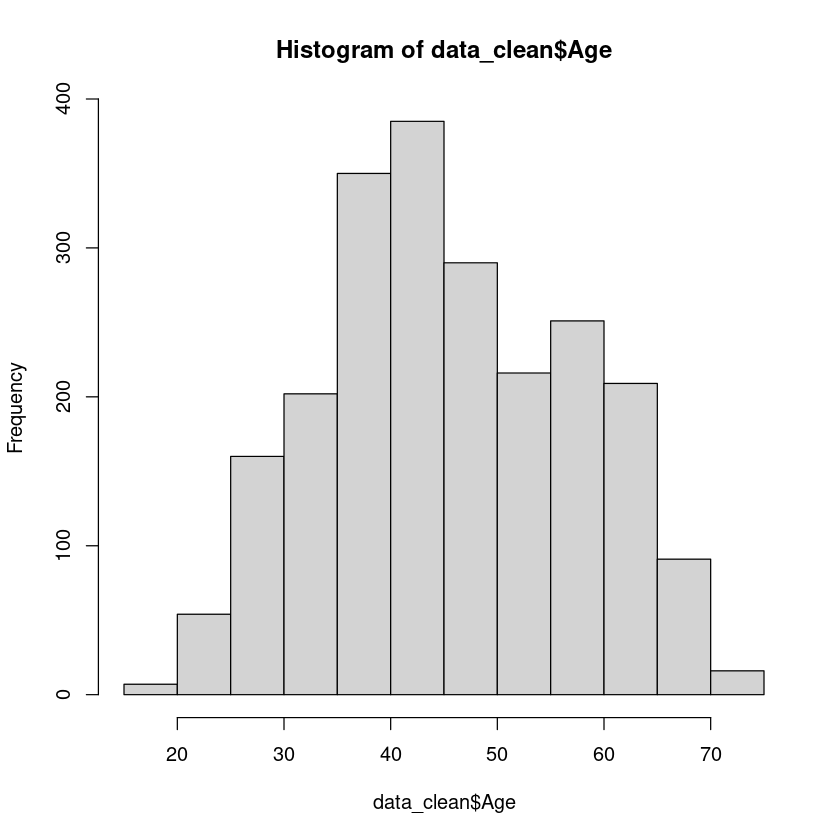

In [18]:
# Charger les bibliothèques nécessaires
library(dplyr)
library(tidyr)

# Définir l'année de référence
annee_actuelle<- 2015

# Calcul de l'âge
data_clean$Age <- annee_actuelle- data_clean$Year_Birth
hist(data_clean$Age)
data_clean <- subset(data_clean, select = -Year_Birth)

In [19]:
# Charger dplyr pour la manipulation des données
library(dplyr)

# Définition des catégories d'âge
bins <- c(18, 25, 34, 45, 54, 64, 84)  # Intervalles d'âge
labels <- c("18-25", "26-35", "36-45", "46-55", "56-65", "66-+")  # Noms des catégories

# Catégorisation des âges en groupes (convertis en facteur)
data_clean <- data_clean %>%
  mutate(Age_Categorie = cut(Age, breaks = bins, labels = labels, right = TRUE, include.lowest = TRUE))

# Afficher un aperçu des données
print(head(data_clean))

    ID  Education Marital_Status Income Kidhome Teenhome Dt_Customer Recency
1 5524 Graduation         Single  58138       0        0  2012-09-04      58
2 2174 Graduation         Single  46344       1        1  2014-03-08      38
3 4141 Graduation       Together  71613       0        0  2013-08-21      26
4 6182 Graduation       Together  26646       1        0  2014-02-10      26
5 5324        PhD        Married  58293       1        0  2014-01-19      94
6 7446     Master       Together  62513       0        1  2013-09-09      16
  MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts
1      635        88             546             172               88
2       11         1               6               2                1
3      426        49             127             111               21
4       11         4              20              10                3
5      173        43             118              46               27
6      520        42              98     

Les données sont maintenant prêtes pour l'analyse.

### Exploration et transformation des données qualitatives

#### Statut Marital

In [20]:
summary(data_clean$Marital_Status)

Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      231      861      479      576       77        2

On décide de supprimer les catégories Absurd et YOLO. De plus, nous allons regrouper les catégories Alone,Single et Widow en Seul et Together, Married  en Couple.

In [21]:
data_clean$Marital_Status <- as.character(data_clean$Marital_Status)

data_clean <- filter(data_clean, Marital_Status != "Absurd")
data_clean <- filter(data_clean, Marital_Status != "YOLO")

data_clean$Marital_Status[data_clean$Marital_Status == "Alone"] <- "Seul"
data_clean$Marital_Status[data_clean$Marital_Status == "Widow"] <- "Seul"
data_clean$Marital_Status[data_clean$Marital_Status == "Single"] <- "Seul"
data_clean$Marital_Status[data_clean$Marital_Status == "Together"] <- "Couple"
data_clean$Marital_Status[data_clean$Marital_Status == "Married"] <- "Couple"
data_clean$Marital_Status[data_clean$Marital_Status == "Divorced"] <- "Divorcé"

data_clean[, "Marital_Status"] <- as.factor(data_clean[, "Marital_Status"])

summary(data_clean$Marital_Status)

Couple Divorcé    Seul 
   1437     231     559

#### Enfants

In [22]:
data_clean$Kidhome <- as.numeric(as.character(data_clean$Kidhome))
data_clean$Teenhome <- as.numeric(as.character(data_clean$Teenhome))

# Calculer le nombre total d'enfants
data_clean$Enfant <- data_clean$Kidhome + data_clean$Teenhome

# Convertir en facteur si tu veux travailler avec des catégories
data_clean$Enfant <- as.factor(data_clean$Enfant)

# Afficher un résumé de la colonne "Enfant"
summary(data_clean$Enfant)

data_clean <- subset(data_clean, select = -c(Kidhome, Teenhome))

0    1    2    3 
 632 1121  421   53

#### Education


In [23]:
summary(data_clean$Education)

2n Cycle      Basic Graduation     Master        PhD 
       200         54       1123        369        481

Afin de simplifier notre jeu de données et d'affiner l'analyse, nous allons regrouper les varaibles "Basic" et "Graduation" en une variable "Moyen". Nous allons aussi regrouper les Master et PhD en "Elevé". Enfin, nous transformons "2nd cycle" en "Faible".

In [24]:
data_clean$Education <- as.character(data_clean$Education)
data_clean$Education[data_clean$Education == "2n Cycle"] <- "Faible"
data_clean$Education[data_clean$Education == "Basic"] <- "Moyen"
data_clean$Education[data_clean$Education == "Graduation"] <- "Moyen"
data_clean$Education[data_clean$Education == "Master"] <- "Elevé"
data_clean$Education[data_clean$Education == "PhD"] <- "Elevé"
data_clean$Education <- as.factor(data_clean$Education)
summary(data_clean$Education)

Elevé Faible  Moyen 
   850    200   1177

#### Campagnes

Ici on va créer une nouvelle variable : le nombre de promotion acceptée.

In [25]:
data_clean$AcceptedCmp1 <- as.numeric(as.character(data_clean$AcceptedCmp1))
data_clean$AcceptedCmp2 <- as.numeric(as.character(data_clean$AcceptedCmp2))
data_clean$AcceptedCmp3 <- as.numeric(as.character(data_clean$AcceptedCmp3))
data_clean$AcceptedCmp4 <- as.numeric(as.character(data_clean$AcceptedCmp4))
data_clean$AcceptedCmp5 <- as.numeric(as.character(data_clean$AcceptedCmp5))
data_clean$Response <- as.numeric(as.character(data_clean$Response))

data_clean$Total_Cmp <- data_clean$AcceptedCmp1+ data_clean$AcceptedCmp2 + data_clean$AcceptedCmp3+ data_clean$AcceptedCmp4 +data_clean$AcceptedCmp5+data_clean$Response

data_clean[, "AcceptedCmp2"] <- as.factor(data_clean[, "AcceptedCmp2"])
data_clean[, "AcceptedCmp1"] <- as.factor(data_clean[, "AcceptedCmp1"])
data_clean[, "AcceptedCmp3"] <- as.factor(data_clean[, "AcceptedCmp3"])
data_clean[, "AcceptedCmp4"] <- as.factor(data_clean[, "AcceptedCmp4"])
data_clean[, "AcceptedCmp5"] <- as.factor(data_clean[, "AcceptedCmp5"])
data_clean[, "Response"] <- as.factor(data_clean[, "Response"])
data_clean[, "Total_Cmp"] <- as.factor(data_clean[, "Total_Cmp"])
summary(data_clean$Total_Cmp)




0    1    2    3    4    5 
1622  367  142   50   36   10

#### Argent dépensé

On créé une nouvelle variable qui prend le total des dépenses pour chaque catégories (Viandes, Fruits etc) 

In [26]:
data_clean$Total_Depense <- data_clean$MntWines+ data_clean$MntFruits + data_clean$MntMeatProducts + data_clean$MntFishProducts +data_clean$MntSweetProducts +data_clean$MntGoldProds
summary(data_clean$Total_Depense)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    68.5   395.0   603.2  1039.5  2525.0 

#### Achat

In [27]:
data_clean$Total_Achat <- data_clean$NumWebPurchases+ data_clean$NumCatalogPurchases + data_clean$NumStorePurchases 
summary(data_clean$Total_Achat)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    6.00   12.00   12.52   18.00   32.00 

Ici, le minimum est à 0 ce qui signifie que certains clients n'ont rien acheté. Cela ne contredit pas ce que nous avions analysé précedemment sur la variable Total_Depense, qui ne prend en compte que les dépenses sur certaines catégories.  

Conclusion du nettoyage des donéees :

In [29]:
data_clean <- subset(data_clean, select = -Age)
summary(data_clean)

       ID         Education    Marital_Status     Income      
 Min.   :    0   Elevé : 850   Couple :1437   Min.   :  1730  
 1st Qu.: 2828   Faible: 200   Divorcé: 231   1st Qu.: 35428  
 Median : 5455   Moyen :1177   Seul   : 559   Median : 51382  
 Mean   : 5588                                Mean   : 51817  
 3rd Qu.: 8419                                3rd Qu.: 68145  
 Max.   :11191                                Max.   :162397  
  Dt_Customer            Recency         MntWines        MntFruits     
 Min.   :2012-07-30   Min.   : 0.00   Min.   :   0.0   Min.   :  0.00  
 1st Qu.:2013-01-17   1st Qu.:24.00   1st Qu.:  24.0   1st Qu.:  1.00  
 Median :2013-07-09   Median :50.00   Median : 174.0   Median :  8.00  
 Mean   :2013-07-10   Mean   :49.16   Mean   : 304.7   Mean   : 26.29  
 3rd Qu.:2013-12-30   3rd Qu.:74.00   3rd Qu.: 505.0   3rd Qu.: 33.00  
 Max.   :2014-06-29   Max.   :99.00   Max.   :1493.0   Max.   :199.00  
 MntMeatProducts MntFishProducts  MntSweetProducts  Mnt

## Analyse exploratoire :

faut peut etre normaliser tout ca avant de faire des matrices de correlation

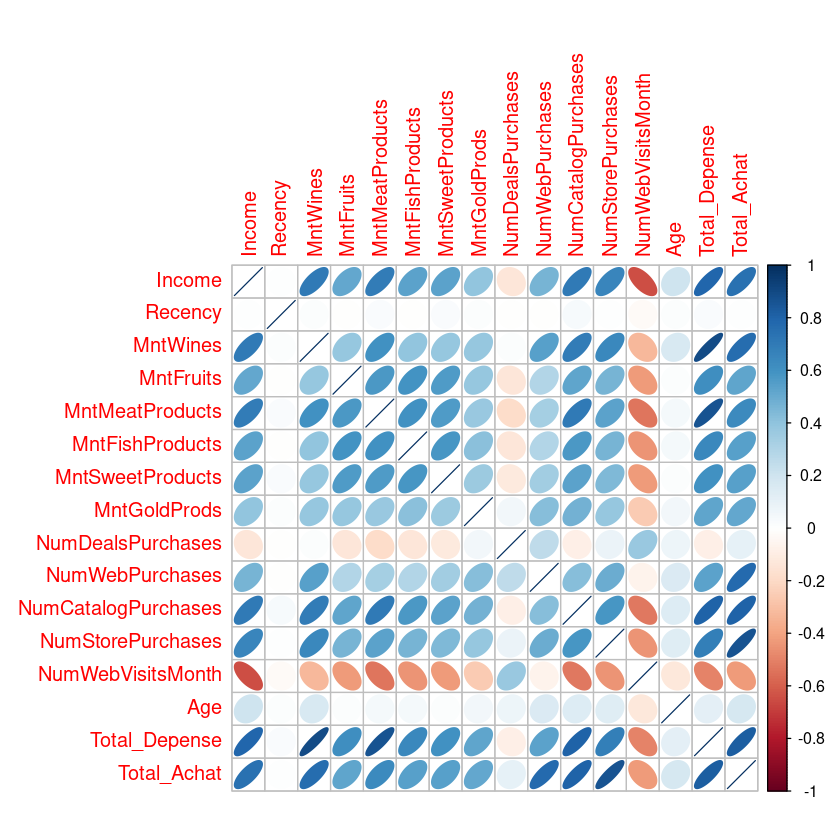

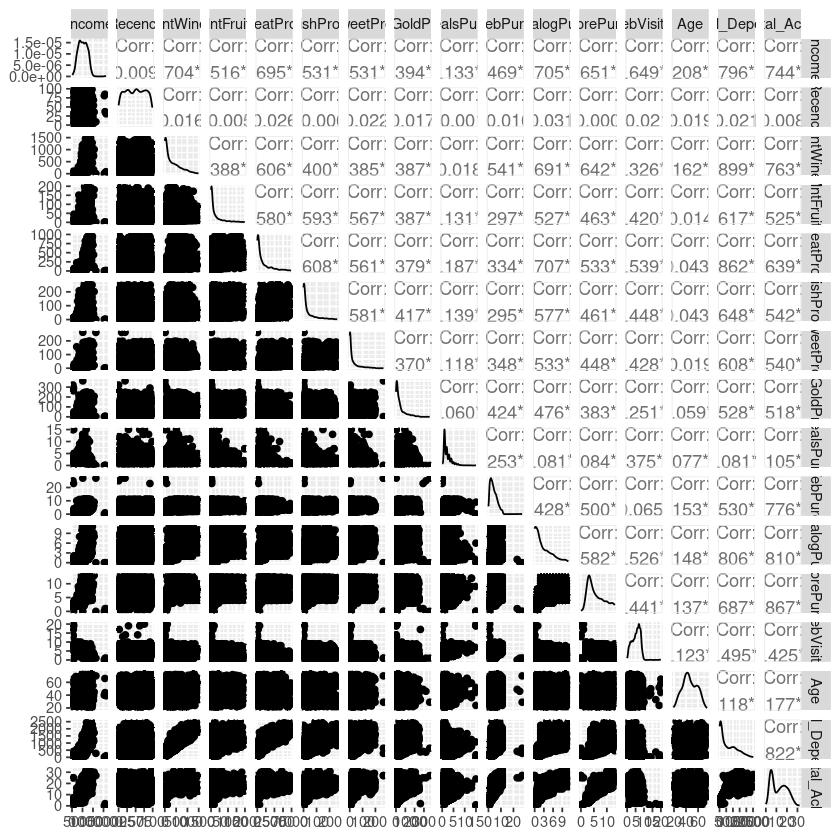

In [33]:
corrplot(cor(data_clean[, c(4,6:17,25,29:30)]),method="ellipse")
ggpairs(data_clean[, c( 4,6:17,25,29:30)])
#on fait la matrice de corrélation

Le revenu est fortement corrélé aux dépenses en viandes et en vin.

### Analyse en composantes principales (ACP) sur les seules variables quantitatives

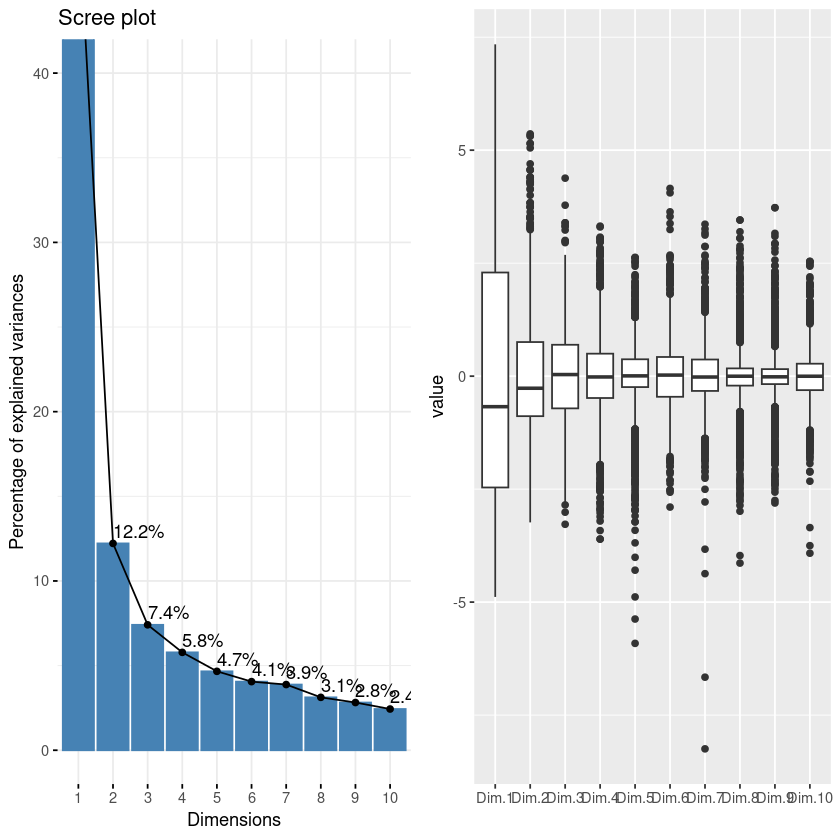

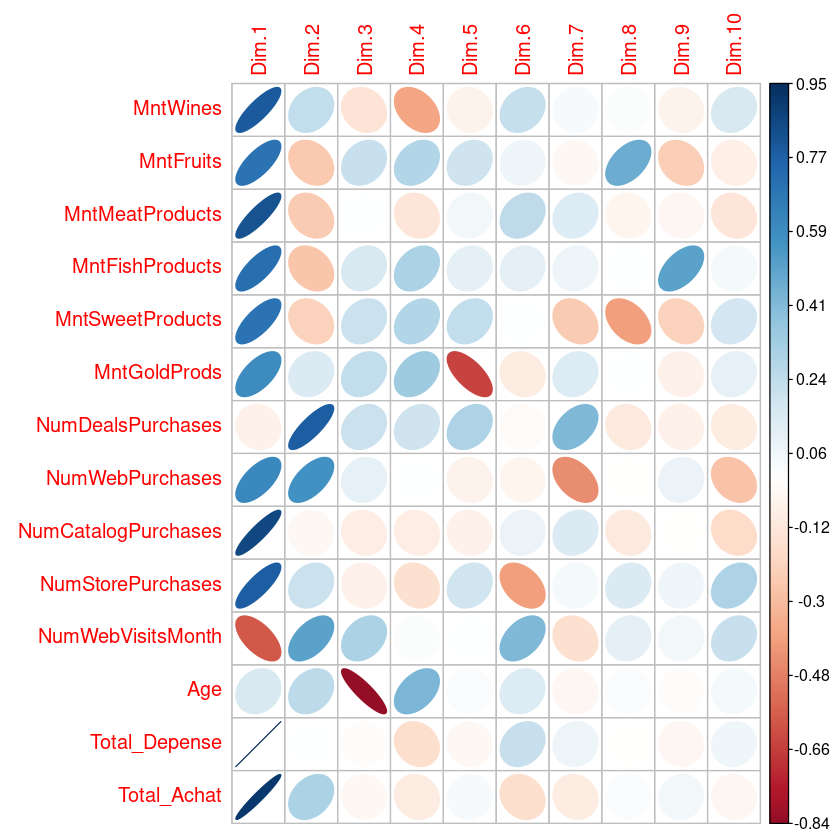

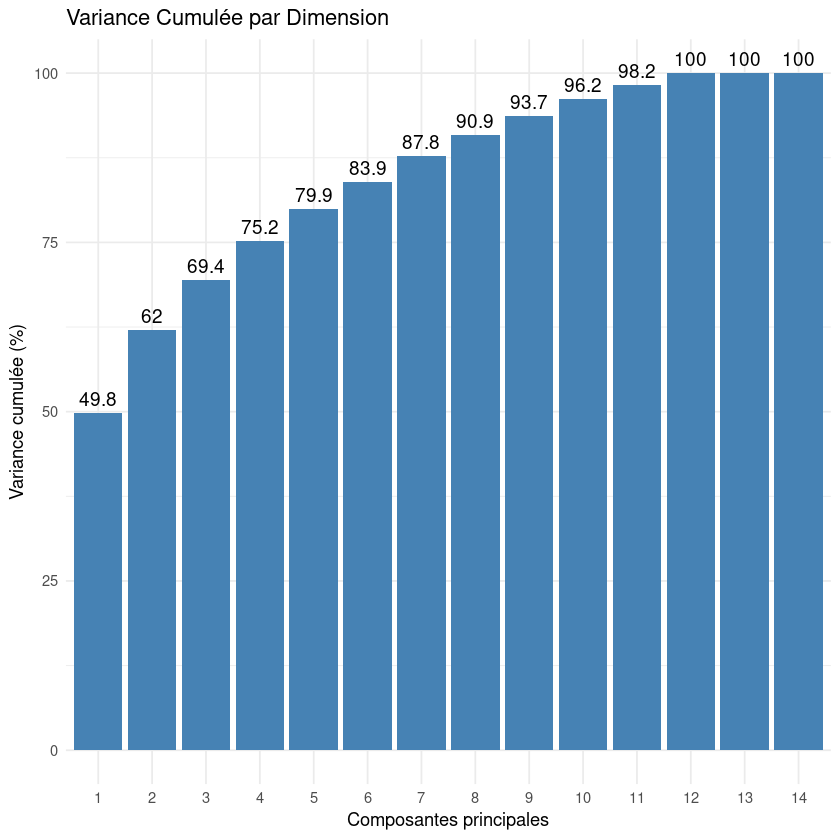

In [36]:
# ACP réduite
library(FactoMineR)
library(tidyr)
library(gridExtra)
acp <- PCA(data_clean[, c(4,6:17,25,29:30)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 10)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 
library(corrplot)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

library(ggplot2)

# Extraire les valeurs propres et la variance expliquée cumulée
eig_vals <- acp$eig[, 2]  # % de variance expliquée
var_cum <- cumsum(eig_vals)  # Variance cumulée

# Création du dataframe pour le ggplot
df_var <- data.frame(Dimension = factor(1:length(var_cum)), Variance_Cumulée = var_cum)

# Tracé du barplot
ggplot(df_var, aes(x = Dimension, y = Variance_Cumulée)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(Variance_Cumulée, 1)), vjust = -0.5, size = 4) +
  labs(title = "Variance Cumulée par Dimension",
       x = "Composantes principales",
       y = "Variance cumulée (%)") +
  theme_minimal()


On garde 5 dimensions.

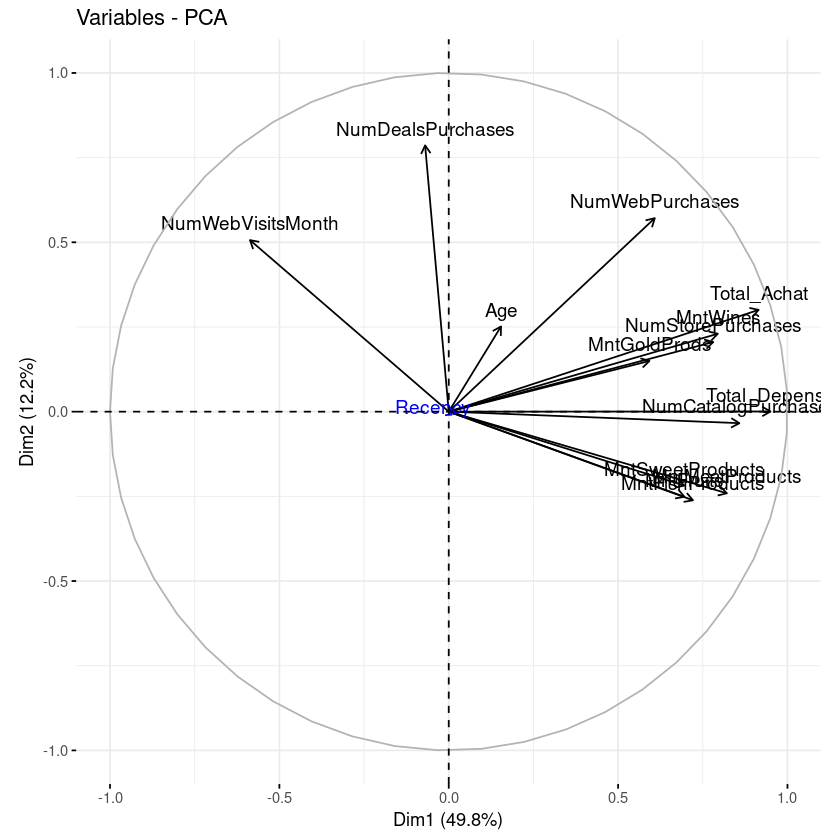

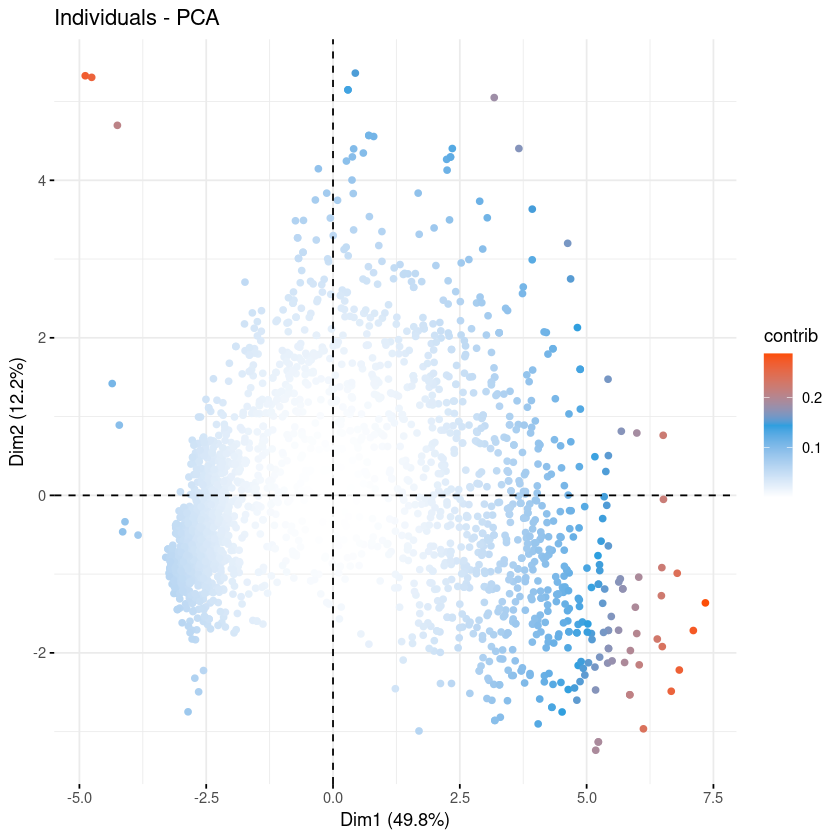

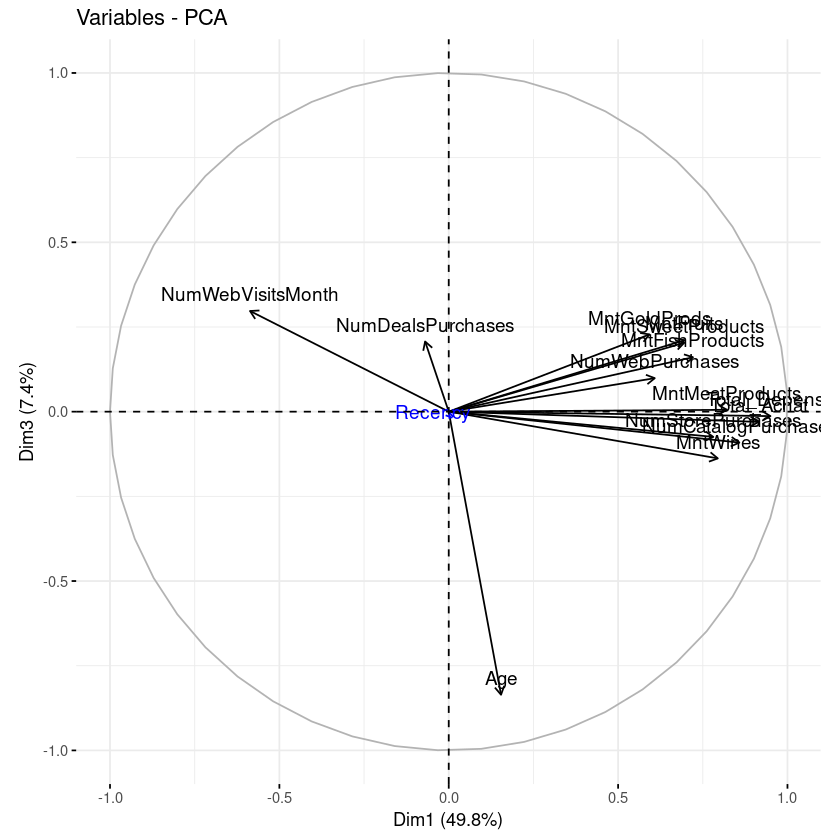

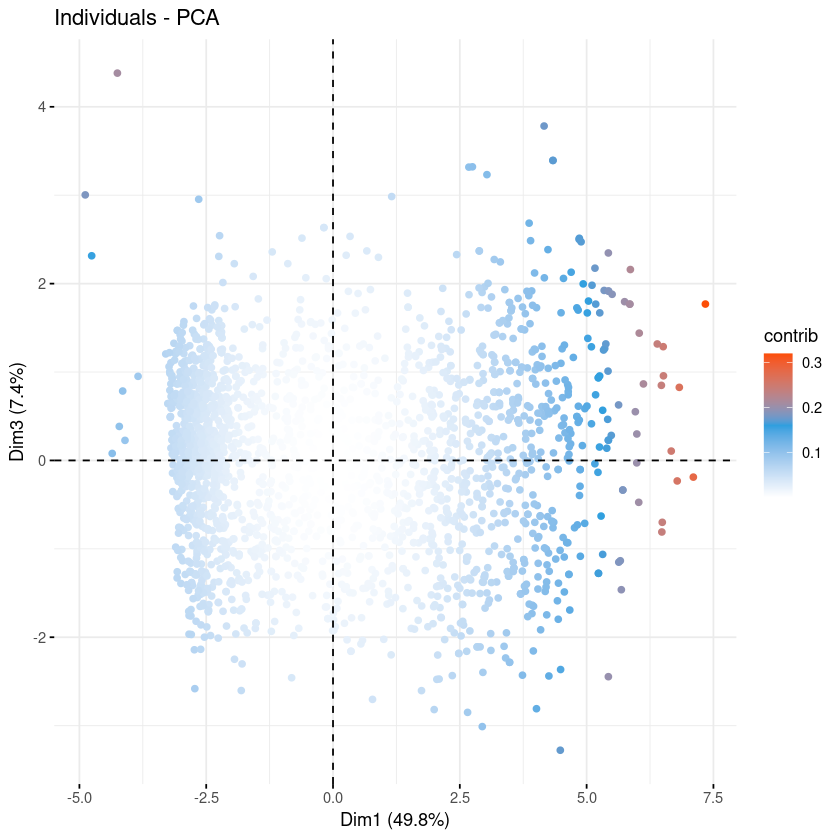

In [35]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

In [37]:
str(data_clean)

'data.frame':	2227 obs. of  30 variables:
 $ ID                 : int  5524 2174 4141 6182 5324 7446 965 6177 4855 5899 ...
 $ Education          : Factor w/ 3 levels "Elevé","Faible",..: 3 3 3 3 1 1 3 1 1 1 ...
 $ Marital_Status     : Factor w/ 3 levels "Couple","Divorcé",..: 3 3 1 1 1 1 2 1 1 1 ...
 $ Income             : num  58138 46344 71613 26646 58293 ...
 $ Dt_Customer        : Date, format: "2012-09-04" "2014-03-08" ...
 $ Recency            : int  58 38 26 26 94 16 34 32 19 68 ...
 $ MntWines           : int  635 11 426 11 173 520 235 76 14 28 ...
 $ MntFruits          : int  88 1 49 4 43 42 65 10 0 0 ...
 $ MntMeatProducts    : int  546 6 127 20 118 98 164 56 24 6 ...
 $ MntFishProducts    : int  172 2 111 10 46 0 50 3 3 1 ...
 $ MntSweetProducts   : int  88 1 21 3 27 42 49 1 3 1 ...
 $ MntGoldProds       : int  88 6 42 5 15 14 27 23 2 13 ...
 $ NumDealsPurchases  : int  3 2 1 2 5 2 4 2 1 1 ...
 $ NumWebPurchases    : int  8 1 8 2 5 6 7 4 3 1 ...
 $ NumCatalogPurchases: int 